### Package Loading 

In [1]:
%run artifactpackage.ipynb
%run Confusionmatrix.ipynb
%run masrur_ploting_utils.ipynb

2023-10-25 04:59:28.152397: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 04:59:28.153915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 04:59:28.185704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 04:59:28.186647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 04:59:28.809000: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Data Loading & Train - Test Split

In [2]:
df = pd.read_csv('/home/masharifin/Documents/ComprehensiveExam/Datasets/ObfuscatedMalMem2022.csv')
df['Class'] = df['Class'].replace({'Benign': 0, 'Malware': 1})
features = df.drop('Class', axis=1).values
Class = df['Class'].values
x=df.drop(columns='Class')
y=df['Class']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
train_size = 0.7 # 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=train_size, random_state=42)

In [3]:
df

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,221,26,24,116,0,121,87,0,8,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,222,26,24,118,0,122,87,0,8,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,222,26,27,118,0,120,88,0,8,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,222,26,27,118,0,120,88,0,8,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,222,26,24,118,0,124,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,1
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,1
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,1
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,1


## Machine Learning Model Build

### Origin_Model_1: Decision Tree

In [4]:
Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

Training Accuracy: 1.0
Test Accuracy: 0.9999431139427726


In [5]:
filename_dt= 'Binary_security_dt_og.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_og.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

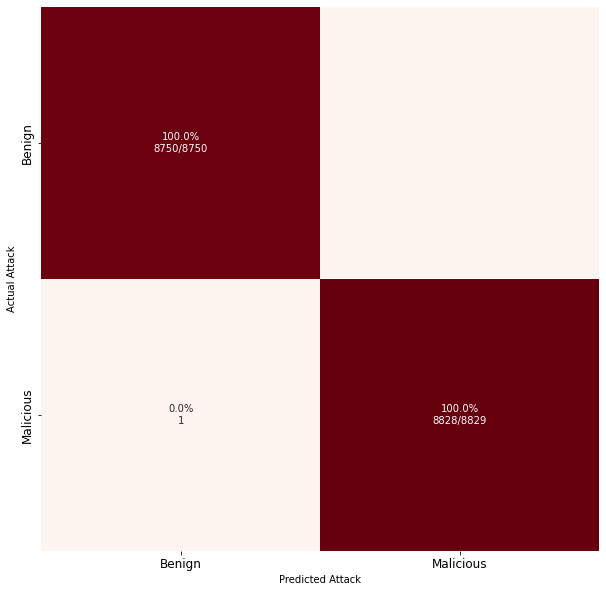

In [6]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                       svcscan.nservices    0.987346
48                svcscan.process_services    0.006502
8             handles.avg_handles_per_proc    0.002993
52                    callbacks.ncallbacks    0.001006
7                         handles.nhandles    0.000877
26                     malfind.ninjections    0.000584
30                   psxview.not_in_pslist    0.000205
11                          handles.nevent    0.000204
19                         handles.nmutant    0.000097
12                        handles.ndesktop    0.000097
34            psxview.not_in_csrss_handles    0.000090
33              psxview.not_in_pspcid_list    0.000000
35                  psxview.not_in_session    0.000000
36                 psxview.not_in_deskthrd    0.000000
32             psxview.not_in_ethread_pool    0.000000
37         psxview.not_in_pslist_false_avg    0.000000
38  psxview.not_in_eprocess_pool_false_avg    0.000000
39   psxvi

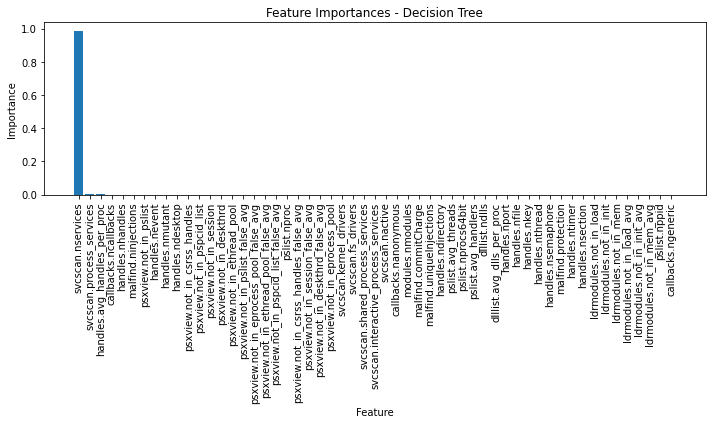

In [7]:
# Get the feature importance scores from the trained Decision Tree model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Decision Tree')
plt.tight_layout()
plt.show()

In [8]:
# Initialize the model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [0.99971559 0.99886234 0.99943117 1.         1.        ]
Mean Score: 0.9996018202502844
Standard Deviation: 0.0004256720576534804


### Origin_Model_2: Random forest

In [9]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

Training Accuracy: 1.0
Test Accuracy: 0.9999431139427726


In [11]:
filename_rf= 'Binary_security_rf_og.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_og.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

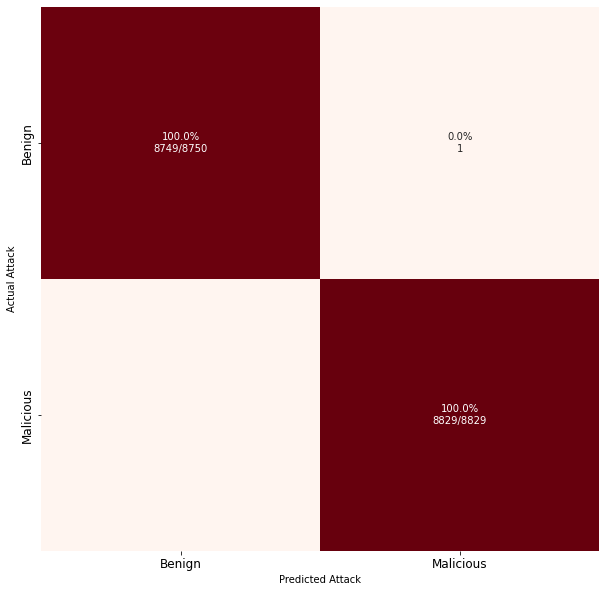

In [12]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

                                   Feature    Importance
45                       svcscan.nservices  1.518828e-01
6                dlllist.avg_dlls_per_proc  1.157632e-01
46                  svcscan.kernel_drivers  8.783107e-02
49         svcscan.shared_process_services  8.428551e-02
19                         handles.nmutant  7.894074e-02
8             handles.avg_handles_per_proc  7.838235e-02
18                        handles.nsection  7.709739e-02
4                      pslist.avg_handlers  6.067243e-02
13                            handles.nkey  4.708024e-02
5                            dlllist.ndlls  2.872453e-02
16                      handles.nsemaphore  2.792461e-02
22                   ldrmodules.not_in_mem  2.561673e-02
17                          handles.ntimer  2.511381e-02
11                          handles.nevent  2.178992e-02
21                  ldrmodules.not_in_init  1.945438e-02
14                         handles.nthread  1.901063e-02
7                         handl

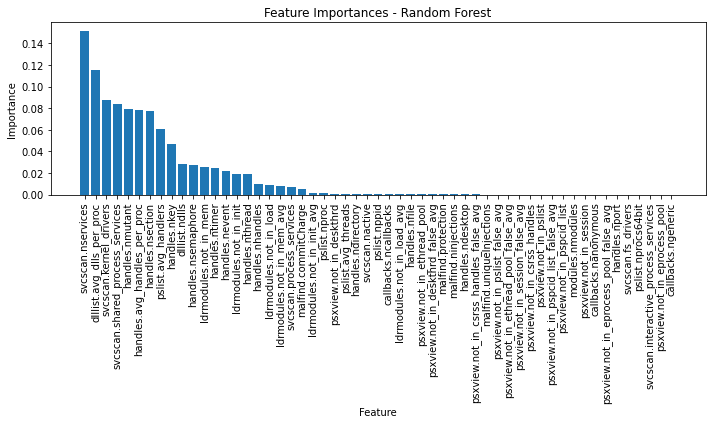

In [13]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [14]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [0.99943117 0.99914676 0.99943117 0.99971559 0.99943101]
Mean Score: 0.9994311394203617
Standard Deviation: 0.00017987928696959517


### Origin_Model_3: LGBM

In [15]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[1 0 1 ... 1 1 1]


0.9998862255295815

In [16]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 1.0
Test Accuracy: 0.9999431139427726


In [17]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8750
           1       1.00      1.00      1.00      8829

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



In [18]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9999431139427726


In [20]:
filename_lgbm= 'Binary_security_lgbm_og.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_og.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

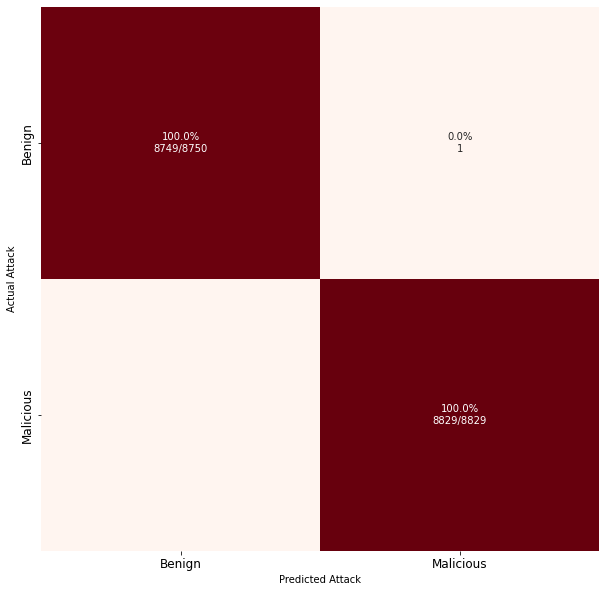

In [21]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature    Importance
45                       svcscan.nservices  1.518828e-01
6                dlllist.avg_dlls_per_proc  1.157632e-01
46                  svcscan.kernel_drivers  8.783107e-02
49         svcscan.shared_process_services  8.428551e-02
19                         handles.nmutant  7.894074e-02
8             handles.avg_handles_per_proc  7.838235e-02
18                        handles.nsection  7.709739e-02
4                      pslist.avg_handlers  6.067243e-02
13                            handles.nkey  4.708024e-02
5                            dlllist.ndlls  2.872453e-02
16                      handles.nsemaphore  2.792461e-02
22                   ldrmodules.not_in_mem  2.561673e-02
17                          handles.ntimer  2.511381e-02
11                          handles.nevent  2.178992e-02
21                  ldrmodules.not_in_init  1.945438e-02
14                         handles.nthread  1.901063e-02
7                         handl

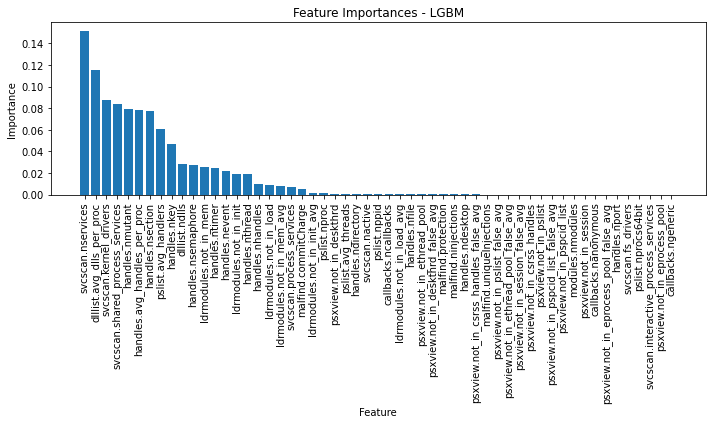

In [23]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM')
plt.tight_layout()
plt.show()

In [24]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1.         0.99943117 0.99971559 1.         0.99943101]
Mean Score: 0.9997155535273012
Standard Deviation: 0.00025442390243073516


### Random Model_4: GaussianNB

In [25]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

Training Accuracy: 0.9922714971840944
Test Accuracy: 0.992377268331532


In [26]:
filename_nb= 'Binary_security_nb.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

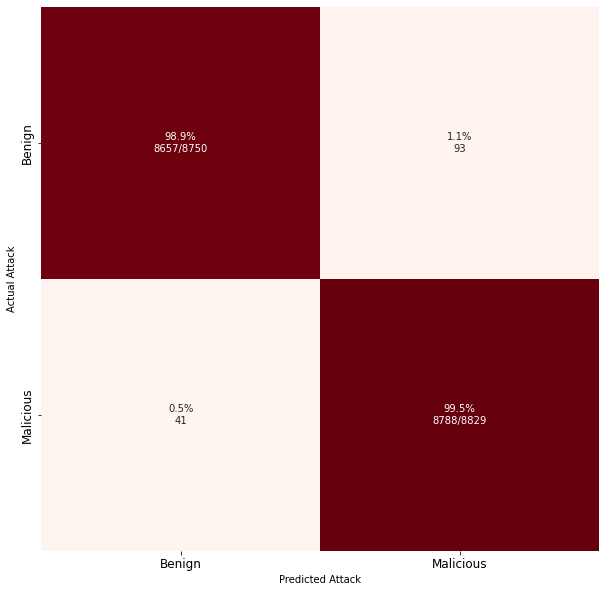

In [27]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [28]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [0.99232082 0.99431172 0.99232082 0.99260523 0.99061166]
Mean Score: 0.992434050720381
Standard Deviation: 0.0011748763691533236


In [43]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

LGBMClassifier()

### ROC 

In [44]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })

In [45]:
proba_df

,DECISIONTREE,RANDOMFORREST,LGBM,NB
0,1.0,1.0,0.999978,1.000000e+00
1,0.0,0.0,0.000022,6.760736e-82
2,1.0,1.0,0.999978,1.000000e+00
3,0.0,0.0,0.000022,6.954264e-51
4,1.0,1.0,0.999978,1.000000e+00
...,...,...,...,...
17574,0.0,0.0,0.000022,6.795941e-67
17575,0.0,0.0,0.000022,7.524527e-67
17576,1.0,1.0,0.999978,1.000000e+00
17577,1.0,1.0,0.999978,1.000000e+00


In [46]:
proba_df.to_csv('probability.csv')

DECISIONTREE
  AUC: 1.0
RANDOMFORREST
  AUC: 1.0
LGBM
  AUC: 1.0
NB
  AUC: 0.996


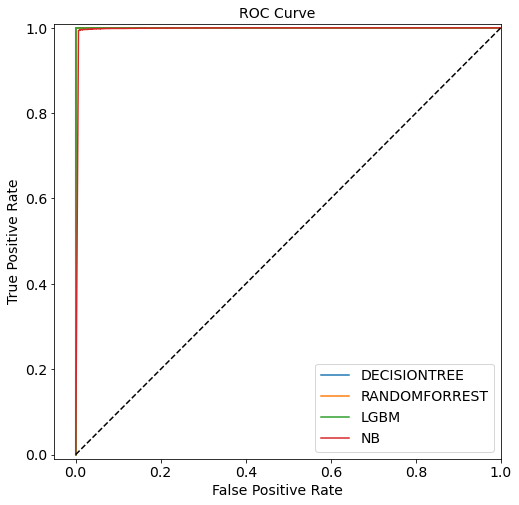

In [47]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [48]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','NB']
est_1=est(clf,name)

In [49]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


done for one
done for one
done for one
done for one


In [50]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

,cross_val_scores,accuracy_scores,error_scores,f1_scores,fpr_scores,kappa_scores,mcc_scores,ppv_scores,sensitivity_scores,specificity_scores,threat_scores,balanced_accuracy_scores
DecisionTree,0.999732,0.999943,0.000057,0.999943,0.000057,0.999886,0.999886,0.999943,0.999943,0.999943,0.999886,0.999943
RandomForest,0.999878,0.999943,0.000057,0.999943,0.000057,0.999886,0.999886,0.999943,0.999943,0.999943,0.999886,0.999943
LightGBM,0.999854,0.999943,0.000057,0.999943,0.000057,0.999886,0.999886,0.999943,0.999943,0.999943,0.999886,0.999943
NB,0.992223,0.992377,0.007623,0.992377,0.007636,0.984754,0.984771,0.992394,0.992377,0.992364,0.984869,0.992371


In [51]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics.csv')

## Deep Learning Model Build

### Model_6:ANN

In [29]:

# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1154/1154 [==============================] - 1s 1ms/step - loss: 3.5773 - accuracy: 0.9427 - val_loss: 0.1909 - val_accuracy: 0.9905
Epoch 2/10
1154/1154 [==============================] - 1s 925us/step - loss: 0.5066 - accuracy: 0.9801 - val_loss: 0.2243 - val_accuracy: 0.9912
Epoch 3/10
1154/1154 [==============================] - 1s 981us/step - loss: 0.4380 - accuracy: 0.9803 - val_loss: 0.1926 - val_accuracy: 0.9946
Epoch 4/10
1154/1154 [==============================] - 1s 978us/step - loss: 0.3160 - accuracy: 0.9875 - val_loss: 0.1383 - val_accuracy: 0.9949
Epoch 5/10
1154/1154 [==============================] - 1s 1ms/step - loss: 0.3342 - accuracy: 0.9836 - val_loss: 0.1725 - val_accuracy: 0.9915
Epoch 6/10
1154/1154 [==============================] - 1s 1ms/step - loss: 0.2104 - accuracy: 0.9884 - val_loss: 0.1917 - val_accuracy: 0.9876
Epoch 7/10
1154/1154 [==============================] - 1s 984us/step - loss: 0.1719 - accuracy: 0.9897 - val_loss: 0.0667 - val_a

In [30]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

550/550 [==============================] - 0s 623us/step - loss: 0.0772 - accuracy: 0.9903
Test accuracy: 0.99033


550/550 [==============================] - 0s 565us/step


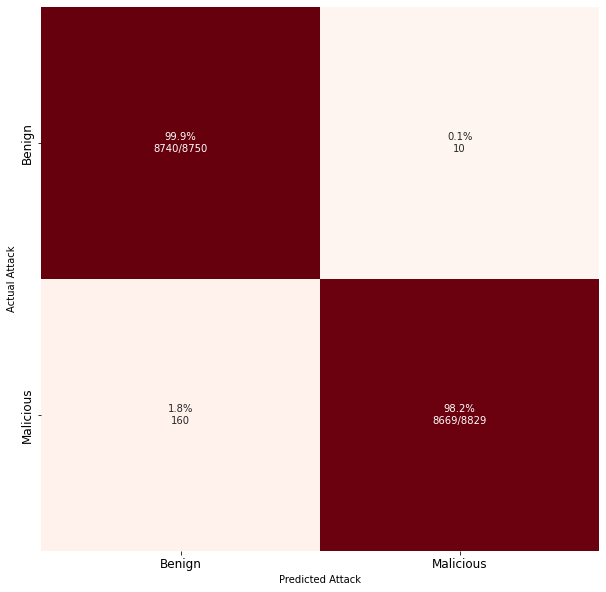

In [31]:
# Save the ANN model to disk
model_ann.save('Binary_security_ann.keras')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann.keras')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

### Model_6:CNN

In [32]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0207 - accuracy: 0.9967 - val_loss: 0.0118 - val_accuracy: 0.9980
Epoch 2/10
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9988
Epoch 3/10
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 4/10
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 5/10
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0066 - accuracy: 0.9992 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 6/10
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 8.5280e-04 - val_accuracy: 0.9998
Epoch 7/10
1154/1154 [==============================] - 3s 3ms/step - loss: 7.1971e-04 - accuracy: 0.9999 - val_loss: 6.6718e-04 - v

# Attack On CNN

### FGSM attack on CNN

In [33]:
# Save the model to an Keras file
model_cnn.save('malmemcnn.keras')


In [34]:
# FGSM Attack
epsilon = 0.1 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image


In [35]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [36]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)
#test_example_tensor

In [37]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 15ms/step - loss: 2.3367 - accuracy: 0.0000e+00
Adversarial accuracy: 0.000000


The result  is related to the Fast Gradient Sign Method (FGSM). Let's break down the output:

"1/1 [==============================] - 0s 15ms/step": This indicates that a single input sample was used for the FGSM attack.

"loss: 2.3367": The loss value of 2.3367 is typically the measure of how well the model performed on the adversarial examples. A high loss value suggests that the attack was successful in perturbing the input such that the model's prediction was significantly different from the original.

"accuracy: 0.0000e+00": This is the accuracy of the model on the adversarial examples generated by the FGSM attack. An accuracy of 0.0000e+00 means that the model's predictions on these adversarial examples were completely incorrect, with no correct predictions.

"Adversarial accuracy: 0.000000": This explicitly states that the model's accuracy on the adversarial examples is 0.000000, which means that the FGSM attack was very successful in causing the model to make incorrect predictions.

In summary, the output indicates that the FGSM attack was highly effective in causing the model to make incorrect predictions with an accuracy of 0.000000, meaning the model failed to correctly classify the adversarial examples. This is a common goal of adversarial attacks: to make the model's predictions unreliable or completely wrong.



### JSMA Attack On CNN

In [38]:
# Load your trained model
model = load_model('malmemcnn.keras')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 0.1 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]


In [39]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map


# Define a function to generate adversarial examples using JSMA
def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()


In [40]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [41]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 12ms/step


In [42]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 16ms/step
Original prediction: [[1.2290381e-08]]
Adversarial prediction: [[0.]]


The result appears to be related to  the Jacobian-based Saliency Map Attack (JSMA). Let's interpret the output:

"Original prediction: [[1.2290381e-08]]": This is the prediction made by the target machine learning model for an input sample before the adversarial attack. In this case, the model predicted a very low probability, approximately 1.2290381e-08, for a specific class or label, indicating that the model assigned a very low likelihood to this class.

"Adversarial prediction: [[0.]]": After the JSMA attack, the prediction of the model changed to 0.0, indicating that the model now predicts a probability of 0 for the class or label it previously assigned a very low probability. In other words, the adversarial example generated by JSMA has successfully manipulated the input in such a way that the model now confidently predicts a different class or outcome than it did originally.

In summary, the output suggests that the JSMA attack was successful in causing the model to change its prediction from a very low probability to a probability of 0, which means that the attack was able to manipulate the input to an extent where the model now confidently predicts a different class. This is a common goal of adversarial attacks: to trick the model into making incorrect predictions.